## Neural Network Multiple Multiclass

In [1]:
%run DataSplitting.ipynb
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
from tensorflow.keras.callbacks import EarlyStopping
# %matplotlib widget
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)
# from public_tests import *
# from autils import *
# from lab_utils_softmax import plt_softmax
np.set_printoptions(precision=2)



Training set: (2923, 11) (2923,)
Testing set: (627, 11) (627,)
Validation set: (627, 11) (627,)

Training set:
      Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
2830   0.525     0.430   0.135        0.8435          0.4325          0.1800   
925    0.430     0.325   0.100        0.3645          0.1575          0.0825   
3845   0.455     0.350   0.105        0.4160          0.1625          0.0970   
547    0.205     0.155   0.045        0.0425          0.0170          0.0055   
2259   0.590     0.465   0.160        1.1005          0.5060          0.2525   

      Shell weight   Age  Sex_F  Sex_I  Sex_M  
2830        0.1815  10.5    1.0    0.0    0.0  
925         0.1050   8.5    0.0    1.0    0.0  
3845        0.1450  12.5    0.0    0.0    1.0  
547         0.0155   8.5    0.0    0.0    1.0  
2259        0.2950  14.5    1.0    0.0    0.0  

Testing set:
      Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
3142   0.215     0.165   0

c:\Users\eltac\anaconda3\envs\eltajenv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\eltac\anaconda3\envs\eltajenv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\eltac\anaconda3\envs\eltajenv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\eltac\anaconda3\envs\eltajenv\lib\site-packages\tensorf

## Model Declaration

In [2]:
#tf.random.set_random_seed(1234) # for consistent results
model = Sequential(
    [
        # Code Assignment STARTS HERE
        tf.keras.layers.InputLayer((X_train.shape[1],)),
        tf.keras.layers.Dense(20, activation="relu", name="L1"),
        tf.keras.layers.Dense(3, activation="softmax", name="L2")
        # Code Assignment ENDS HERE
    ], name = "my_model"
)


# Examine Layer Weights

In [3]:
#### Examine Weights shapes
#Code Assignment STARTS HERE
[layer1, layer2] = model.layers
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
#Code Assignment ENDS HERE

W1 shape = (11, 20), b1 shape = (20,)
W2 shape = (20, 3), b2 shape = (3,)


## Define Loss function

In [4]:
# We compile the model with previously set layers 
#with their neruon size and activation functions

#We can change the Optimizer Parameter in the second line of the called function/
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)


model.summary()
# We use early stopping here, the idea is to stop training when certain criteria is met
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

#y_train = [Age<8, Age>=8 && Age<15, Age>15]
#y_train_classification=['young','middle-age','old']
#y_train_encoded = [2,0,1]

# the above is how we encode the continuous age variable
history = model.fit(
    X_train_scaled, y_train_encoded,
    validation_data=(X_val_scaled, y_val_encoded),
    epochs=30,
    batch_size=32, 
    callbacks=[early_stopping]
)

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
L1 (Dense)                   (None, 20)                240       
_________________________________________________________________
L2 (Dense)                   (None, 3)                 63        
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________
Train on 2923 samples, validate on 627 samples
Epoch 1/30
2923/2923 [==============================] - 0s 74us/sample - loss: 0.7347 - val_loss: 0.5831
Epoch 2/30
2923/2923 [==============================] - 0s 30us/sample - loss: 0.5385 - val_loss: 0.4989
Epoch 3/30
2923/2923 [==============================] - 0s 25us/sample - loss: 0.4691 - val_loss: 0.4353
Epoch 4/30
2923/2923 [==============================] - 0s 27us/sample - loss: 0.4087 - val_loss: 0.3765
Epoch 5/30
2923/2923 [==============================] -

# Loss Plot

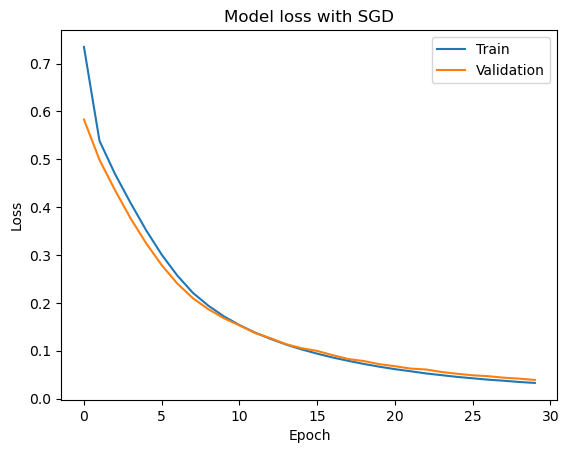

In [5]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss with SGD')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## Tuning and Evaluation

In [7]:
def build_model(num_neurons):
    model_2 = Sequential([
        tf.keras.layers.InputLayer((X_train.shape[1],)),
        tf.keras.layers.Dense(num_neurons, activation="relu", name="L1"),
        tf.keras.layers.Dense(3, activation="softmax", name="L2")
    ], name="my_model_2")

    model_2.compile(
         loss=tf.keras.losses.SparseCategoricalCrossentropy(),
         optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    )

    return model_2

### You can uncomment the following lines for observation of different neurons and how they
### affect val_loss and loss

# neuron_configs = [5, 10, 20, 30, 50]
# validation_losses = []


# for num_neurons in neuron_configs:
#     model_2 = build_model(num_neurons)
#     #using early stopping to automatically stop training when the validation loss stops improving. This can prevent overfitting. 
#     early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

#     history = model_2.fit(X_train_scaled, y_train_encoded, validation_data=(X_val_scaled, y_val_encoded), epochs=30, batch_size=32, callbacks=[early_stopping])
#     # Evaluate and print performance metrics
#     eval_metrics = model_2.evaluate(X_val_scaled, y_val_encoded)
#     validation_loss = eval_metrics
#     validation_losses.append((num_neurons, validation_loss))

# # Sort and print validation losses
# sorted_losses = sorted(validation_losses, key=lambda x: x[1])
# for neurons, loss in sorted_losses:
#     print(f"Neurons: {neurons}, Validation Loss: {loss}")

## Prediction

In [8]:
###Reminder of encoding again
#y_train = [Age<8, Age>=8 && Age<15, Age>15]
#y_train_classification=['young','middle-age','old']
#y_train_encoded = [2,0,1]

##The following line is for predicting with our model for individual row of dataset

age_of_index = X_test_scaled[300]
prediction = model.predict(age_of_index.reshape(1,11))  # prediction
print(f" predicting: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

 predicting: 
[[3.28e-07 3.83e-11 1.00e+00]]
 Largest Prediction index: 2


## Unmatched Prediction and Real Value

In [10]:
### This part takes the test set which model hasn't seen before and checks the accuracy of the model
### with test set, model performance metric is accuracy

y_pred=model.predict(X_test_scaled)  
# Get the predicted class labels
predicted_classes = np.argmax(y_pred, axis=1)
# Find indices where predictions don't match true labels
incorrect_indices = np.where(predicted_classes != y_test_encoded)[0]
# Store incorrect predictions for later printing
incorrect_predictions = []
# Print out the ages and corresponding predictions for the incorrect instances
for index in incorrect_indices:
    age = y_test_encoded[index]
    prediction = predicted_classes[index]
    incorrect_predictions.append((index, age, prediction))
# Calculate accuracy
accuracy = np.sum(predicted_classes == y_test_encoded) / len(y_test_encoded)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


## Confusion Matrix

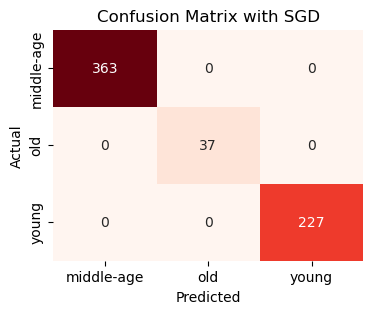

In [11]:
conf_matrix = confusion_matrix(y_test_encoded, predicted_classes)
plt.figure(figsize=(4,3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['middle-age', 'old', 'young'],
            yticklabels=['middle-age', 'old', 'young'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with SGD')
plt.show()

## Cross Validation

In [12]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import numpy as np

# Combine training and validation sets for cross-validation
X_combined = np.concatenate((X_train_scaled, X_val_scaled), axis=0)
y_combined = np.concatenate((y_train_encoded, y_val_encoded), axis=0)

# Define the K-fold Cross Validator
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
acc_per_fold = []
loss_per_fold = []

for train, test in kfold.split(X_combined, y_combined):
    # Define the model architecture
    model = Sequential([
        Dense(20, activation='relu', input_shape=(X_combined.shape[1],)),
        Dense(3, activation='softmax')
    ])

    # Compile the model
    model.compile(loss=SparseCategoricalCrossentropy(),
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])
    
    # Fit data to model
    history = model.fit(X_combined[train], y_combined[train],
                        batch_size=32,
                        epochs=30,
                        verbose=0)

    # Generate generalization metrics
    scores = model.evaluate(X_combined[test], y_combined[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    fold_no += 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')


Score for fold 1: loss of 0.03652903358911125; acc of 99.57746267318726%
Score for fold 2: loss of 0.03651346956760111; acc of 99.29577708244324%
Score for fold 3: loss of 0.03879973041549535; acc of 99.7183084487915%
Score for fold 4: loss of 0.031530673098816; acc of 100.0%
Score for fold 5: loss of 0.04299570371357488; acc of 99.57746267318726%
------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.03652903358911125 - Accuracy: 99.57746267318726%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.03651346956760111 - Accuracy: 99.29577708244324%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.03879973041549535 - Accuracy: 99.7183084487915%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.031530673098816 - Accuracy: 100.0%
-------------